In [2]:
%matplotlib notebook
%reload_ext autoreload
%autoreload 2

# Set defaults for charts so they aren't so tiny!
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [10,5]

import numpy
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from pprint import pprint
import math
import pandas as pd
import csv
import sklearn.covariance
import scipy.optimize
import sklearn.linear_model
import scipy.stats

In [8]:
with open('paramater_weighting_results.csv', 'rt') as file:
    reader = csv.DictReader(file)
    results = list([dict(item) for item in reader])
    
results = [{key:(float(item) if '.' in item else item) for key,item in result.items()} for result in results]
for result in results:
    result['stdvsmedian'] = result['std'] / result['median']
    result['stdvsmin'] = result['std'] / result['min']

    
nonFeatureKeys=['gamma', 'loss', 'min', 'median', 'max', 'best', 'bestSize', 'predicted']
lossKeys = ['secondaryCutoff_0.0', 
            'secondaryCutoff_0.1',
            'secondaryCutoff_0.2',
            'secondaryCutoff_0.3',
            'secondaryCutoff_0.4',
            'secondaryCutoff_0.5', 
            'secondaryCutoff_0.6',
            'secondaryCutoff_0.7',
            'secondaryCutoff_0.8',
            'secondaryCutoff_0.9',
            'secondaryCutoff_1.0']

for result in results:
    best = min(lossKeys, key=lambda key: result[key])
    result['best'] = best
    result['bestSize'] = float(best[len('secondaryCutoff_'):])

    
pd.DataFrame(results)

,best,best/median,bestSize,contributions_exponential,contributions_linear,contributions_logarithmic,contributions_peakvalley,contributions_random,interactions,interactions_index,...,secondaryCutoff_0.5,secondaryCutoff_0.6,secondaryCutoff_0.7,secondaryCutoff_0.8,secondaryCutoff_0.9,secondaryCutoff_1.0,skew,std,stdvsmedian,stdvsmin
0,secondaryCutoff_0.6,0.851308,0.6,0.25,0.1875,0.125,0.3125,0.125,81,1.05469,...,0.244571,0.238053,0.241726,0.242689,0.244025,0.243526,1.092849,0.035746,0.125077,0.146786
1,secondaryCutoff_1.0,0.861220,1.0,0.214286,0.285714,0.357143,0.0714286,0.0714286,63,1.07143,...,0.241567,0.236554,0.232075,0.235306,0.233215,0.230025,1.339295,0.037123,0.139111,0.161385
2,secondaryCutoff_1.0,0.955213,1.0,0.333333,0.333333,0,0,0.333333,3,1.11111,...,0.267723,0.266893,0.267052,0.266792,0.266923,0.266403,2.461891,0.045867,0.164423,0.172172
3,secondaryCutoff_0.8,0.871417,0.8,0.25,0.125,0,0.4375,0.1875,77,1.0026,...,0.251097,0.249506,0.243741,0.243199,0.243269,0.246958,1.272187,0.032373,0.114218,0.131087
4,secondaryCutoff_0.9,0.839894,0.9,0.333333,0.166667,0.0833333,0.166667,0.25,37,0.856481,...,0.231017,0.222021,0.222399,0.222991,0.216540,0.223249,1.593474,0.046300,0.174069,0.207392
5,secondaryCutoff_1.0,0.719742,1.0,0.428571,0.428571,0,0.142857,0,16,1.08844,...,0.180262,0.175080,0.184276,0.166975,0.168905,0.165008,1.514748,0.074144,0.321879,0.449337
6,secondaryCutoff_0.3,0.635984,0.3,0.2,0.4,0.2,0.2,0,10,1.33333,...,0.126324,0.108186,0.124817,0.124340,0.105386,0.109904,1.512848,0.079006,0.460581,0.718866
7,secondaryCutoff_0.9,0.766954,0.9,0.375,0.25,0,0.25,0.125,19,0.989583,...,0.174835,0.178903,0.170868,0.167633,0.166779,0.170090,1.379424,0.055140,0.248246,0.324184
8,secondaryCutoff_1.0,0.761299,1.0,0.333333,0,0.111111,0.222222,0.333333,22,0.90535,...,0.132617,0.132436,0.129379,0.131906,0.130348,0.127772,1.539426,0.045282,0.269470,0.354395
9,secondaryCutoff_0.7,0.781090,0.7,0,0,0.166667,0.166667,0.666667,6,0.555556,...,0.113180,0.114818,0.112308,0.112553,0.116125,0.121164,1.752630,0.057624,0.370964,0.475585


<IPython.core.display.Javascript object>


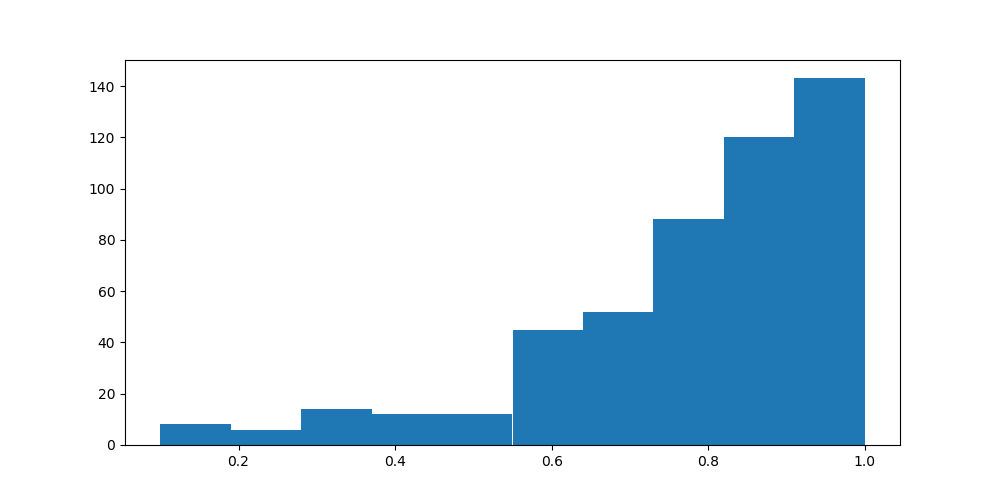

In [9]:
sizes = [result['bestSize'] for result in results]

averageSize = numpy.max(sizes)

ax, fig = plt.subplots()

fig.hist(sizes)

fig


In [12]:
counts = {}
for key in lossKeys:
    counts[key]=0
for result in results:
    counts[result['best']] += 1


pprint(counts)

{'secondaryCutoff_0.0': 0,
 'secondaryCutoff_0.1': 8,
 'secondaryCutoff_0.2': 6,
 'secondaryCutoff_0.3': 14,
 'secondaryCutoff_0.4': 12,
 'secondaryCutoff_0.5': 12,
 'secondaryCutoff_0.6': 45,
 'secondaryCutoff_0.7': 52,
 'secondaryCutoff_0.8': 88,
 'secondaryCutoff_0.9': 120,
 'secondaryCutoff_1.0': 143}


<IPython.core.display.Javascript object>


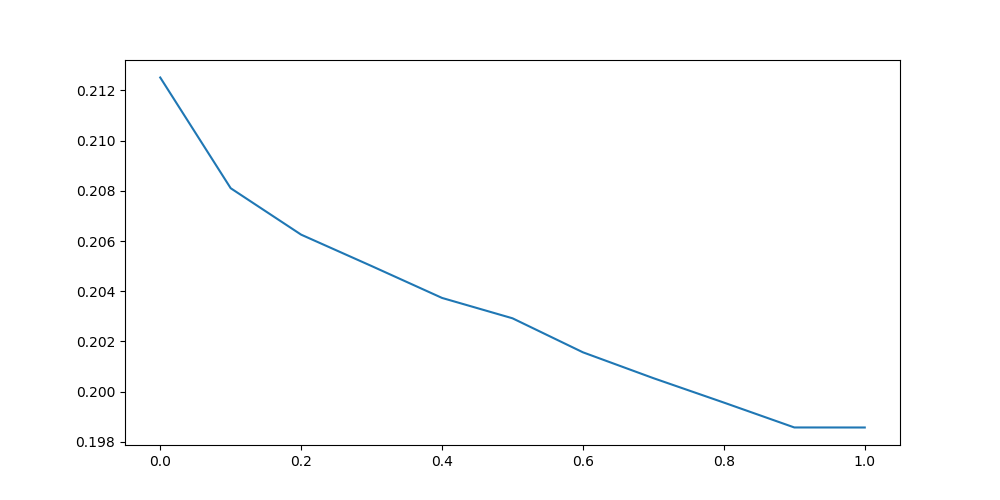

In [13]:
averageLoss = {}

for key in lossKeys:
    length = float(key[len('secondaryCutoff_'):])
    averageLoss[length] = numpy.mean([result[key] for result in results])


averageLoss
ax, fig = plt.subplots()
fig.plot(averageLoss.keys(), averageLoss.values())
fig

In [24]:
labels = [key for key in results[0].keys() if key not in nonFeatureKeys and key not in lossKeys]

bestSizes = [result['bestSize'] for result in results]

correlations = []
for label in labels:
    vector = [result[label] for result in results]
    correlation = scipy.stats.spearmanr(vector, bestSizes)[0]
    correlations.append({'name': label, 'correlation': correlation})

    
with open('correls.csv', 'wt') as file:
    writer = csv.DictWriter(file, fieldnames=['name','correlation'])
    writer.writeheader()
    writer.writerows(correlations)


correlations = list(sorted(correlations, key=lambda r:-abs(r['correlation'])))
pd.DataFrame(correlations)

/home/bradley/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:245: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  "values. nan values will be ignored.", RuntimeWarning)


,correlation,name
0,0.318258,log10_cardinality
1,-0.263158,stdvsmedian
2,-0.252596,stdvsmin
3,-0.250167,num_parameters
4,-0.237943,skew
5,-0.218569,std
6,-0.205125,kurtosis
7,0.121009,interactions
8,0.116457,interactions_index
9,0.102095,interactions_wave


In [25]:
def plot(variable, rounding, lim=None):
    pairs = [(float(round(result[variable]*(1/rounding))/(1/rounding)), float(result['bestSize'])) for result in results]
    pairs = sorted(pairs, key=lambda r:r[0])
    bestSizes = [p[1] for p in pairs]
    values = [p[0] for p in pairs]
    
    means = []
    meanValues = []
    allValues = set(values)
    for v in sorted(allValues):
        valueBestSizes = [bestSizes[i] for i in range(len(bestSizes)) if '{:.3E}'.format(values[i]) == '{:.3E}'.format(v)]
        meanValues.append(v)
        means.append(numpy.mean(valueBestSizes))
    
    ax, fig = plt.subplots()
    fig.set_xlabel(variable)
    fig.set_ylabel('secondaryCutoff')
    fig.set_xticks(numpy.linspace(numpy.min(values),numpy.max(values),10))
    fig.set_yticks(numpy.linspace(0,1,10))
    fig.set_ylim(0, 1.1)
    if lim:
        fig.set_xlim(0, lim)
    fig.xaxis.set_minor_formatter(mticker.ScalarFormatter())
    fig.xaxis.set_major_formatter(mticker.ScalarFormatter())
    fig.yaxis.set_minor_formatter(mticker.ScalarFormatter())
    fig.yaxis.set_major_formatter(mticker.ScalarFormatter())
    fig.scatter(values, bestSizes)
    fig.plot(meanValues, means, 'r')
    return fig

<IPython.core.display.Javascript object>


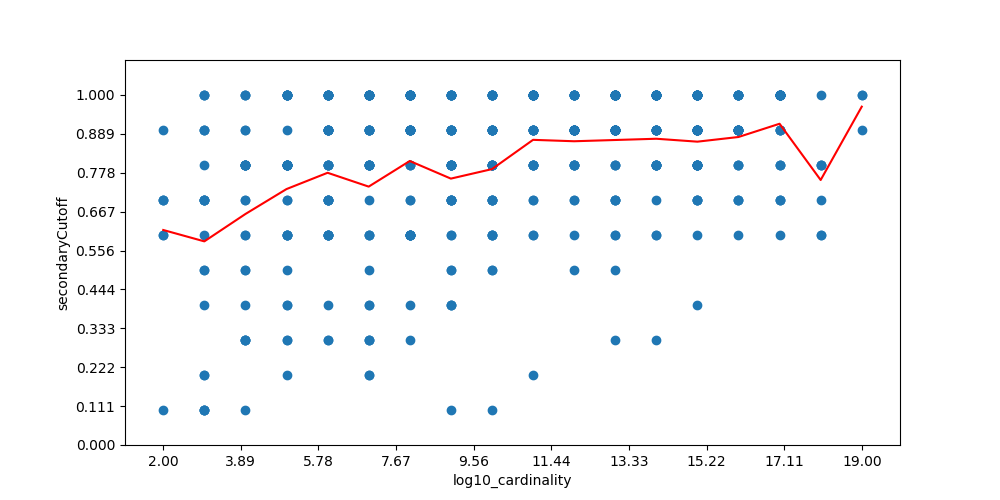

In [26]:
plot('log10_cardinality', 1)

<IPython.core.display.Javascript object>


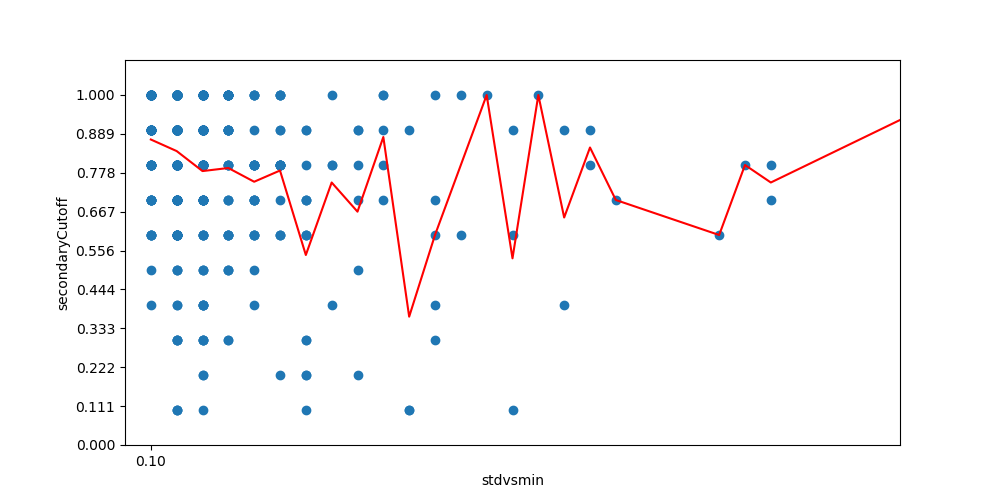

In [29]:
plot('stdvsmin', 0.1, 3)

<IPython.core.display.Javascript object>


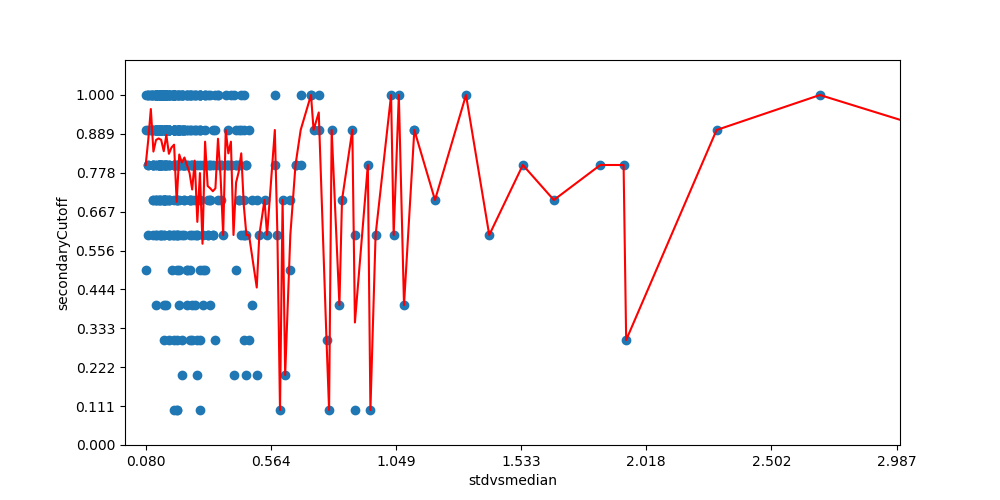

In [33]:
plot('stdvsmedian', 0.01, 3)

<IPython.core.display.Javascript object>


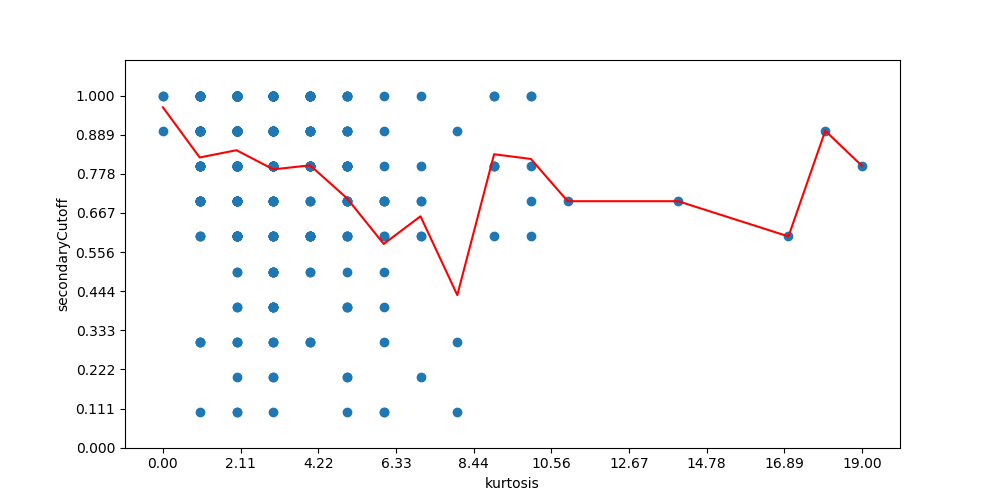

In [43]:
plot('kurtosis', 1)

<IPython.core.display.Javascript object>


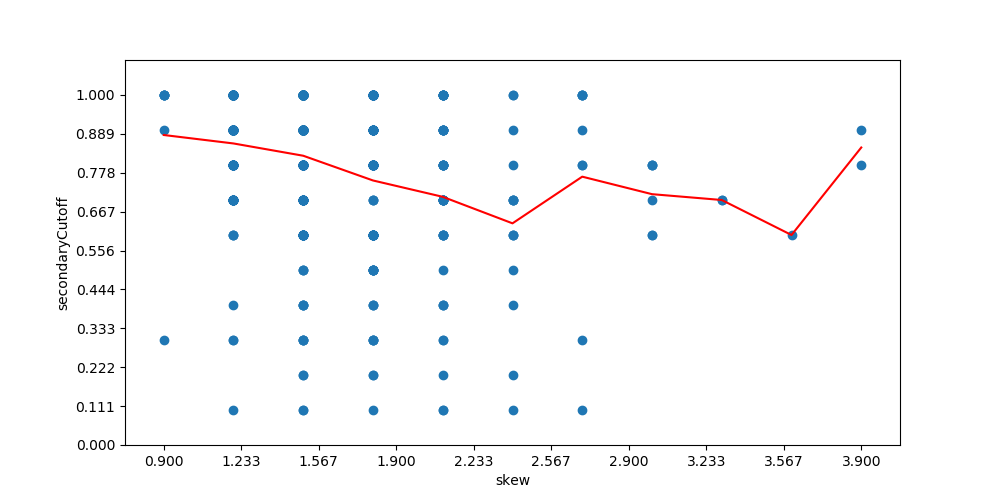

In [38]:
plot('skew', 0.3)

In [44]:
fields = sorted(results[0].keys())
fields = [field for field in fields if 'contributions' not in field and 'interactions' not in field and field not in lossKeys and field not in nonFeatureKeys]
vectors = [[float(result[f]) for f in fields] for result in features]
n_EI_candidates = [result['bestSize'] for result in results]
deviations = numpy.std(vectors, axis=0)
covarianceModel = sklearn.covariance.LedoitWolf()
covarianceModel.fit(numpy.array(vectors), numpy.array(n_EI_candidates))
deviations = numpy.std(vectors, axis=0)

rows = []
for i,l in enumerate(fields):
    data = {fields[k]:round(100*(covarianceModel.covariance_[i][k] / (deviations[i] * deviations[k]))) if k!= i else '' for k in range(len(fields))}
    data ['field'] = fields[i]
    rows.append(data)
pd.DataFrame(rows)

,best/median,field,kurtosis,log10_cardinality,num_parameters,range,skew,std,stdvsmedian,stdvsmin
0,,best/median,-14,44,44,33,-16,-62,-65,-59
1,-14,kurtosis,,-53,-54,-17,95,32,45,27
2,44,log10_cardinality,-53,,97,10,-60,-64,-50,-24
3,44,num_parameters,-54,97,,11,-61,-65,-52,-25
4,33,range,-17,10,11,,-16,17,-19,-15
5,-16,skew,95,-60,-61,-16,,43,51,26
6,-62,std,32,-64,-65,17,43,,74,32
7,-65,stdvsmedian,45,-50,-52,-19,51,74,,65
8,-59,stdvsmin,27,-24,-25,-15,26,32,65,


In [47]:
predictors = ['skew', 'log10_cardinality']

filteredResults = results

vectors = [[result[predictor] for predictor in predictors] for result in filteredResults]
gammas = [result['bestSize'] for result in filteredResults]



model = sklearn.linear_model.Ridge(alpha = .5)
model.fit(vectors, gammas)


weights = {predictors[i]: model.coef_[i] for i in range(len(predictors))}
weights['intercept'] = model.intercept_
pd.DataFrame([weights])

,intercept,log10_cardinality,skew
0,0.648751,0.016682,-0.009638


In [48]:
def roundPrecision(number, precision=3):
    """ Rounds the given floating point number to a certain precision, for output."""
    return float(('{:.' + str(precision) + 'E}').format(number))


equation = "Cutoff = " + str(roundPrecision(weights['intercept'], 1))
for predictor in predictors:
    equation += " + " + str(predictor) + " * " + str(roundPrecision(weights[predictor], 1))
print(equation)

Cutoff = 0.65 + skew * -0.0096 + log10_cardinality * 0.017
